In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
drug_df = pd.read_csv('../data/Screened_Compounds.csv', index_col='DRUG_ID')

In [4]:
drug_df.describe()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
count,267,220,267,267
unique,252,206,202,24
top,AKT inhibitor VIII,"CT 99021, CHIR99021, CHIR 99021","MEK1, MEK2",Other
freq,2,2,7,47


In [5]:
drug_df.head()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
DRUG_ID,,,,
1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


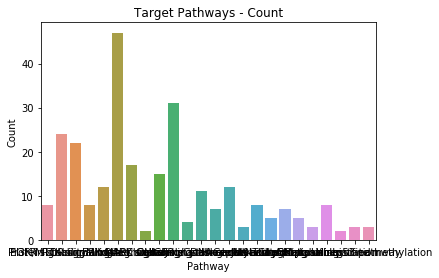

In [6]:
# plot counts of soil types
ax = sns.countplot(drug_df['TARGET_PATHWAY'])
ax.set(xlabel='Pathway', ylabel='Count', title='Target Pathways - Count')
plt.show()

In [52]:
drug_df['TARGET_COUNT'] = drug_df['TARGET'].str.split(",").str.len()

In [53]:
drug_df.head()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,TARGET_COUNT
DRUG_ID,,,,,
1,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling,1
3,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling,1
5,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling,6
6,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling,1
9,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation,2


In [54]:
pathway_df = drug_df.groupby(['TARGET_PATHWAY'])

In [57]:
pathway_df.count()

,DRUG_NAME,SYNONYMS,TARGET,TARGET_COUNT
TARGET_PATHWAY,,,,
ABL signaling,2,2,2,2
Apoptosis regulation,8,6,8,8
Cell cycle,15,10,15,15
Chromatin histone acetylation,11,7,11,11
Chromatin histone methylation,3,2,3,3
Chromatin other,5,4,5,5
Cytoskeleton,7,5,7,7
DNA replication,12,10,12,12
EGFR signaling,8,8,8,8


In [56]:
pathway_df['TARGET_COUNT'].sum()

TARGET_PATHWAY
ABL signaling                         2
Apoptosis regulation                 16
Cell cycle                           33
Chromatin histone acetylation        20
Chromatin histone methylation         3
Chromatin other                      13
Cytoskeleton                         13
DNA replication                      12
EGFR signaling                       11
ERK MAPK signaling                   26
Genome integrity                     13
Hormone-related                       3
IGFR signaling                        7
JNK and p38 signaling                12
Metabolism                            3
Mitosis                              18
Other                                89
Other, kinases                       57
PI3K/MTOR signaling                  43
Protein stability and degradation     9
RTK signaling                        65
Unclassified                          3
WNT signaling                        10
p53 pathway                           3
Name: TARGET_COUNT, dtype

In [65]:

target_drug_list = []


for index, row in drug_df.iterrows():
    for target in row['TARGET'].split(","):
        
        target_drug_list.append([target.strip(), row['DRUG_NAME'], index, row['TARGET_PATHWAY']])








In [71]:
target_drug_df = pd.DataFrame(target_drug_list)

In [72]:
target_drug_df.head()

,0,1,2,3
0,EGFR,Erlotinib,1,EGFR signaling
1,MTORC1,Rapamycin,3,PI3K/MTOR signaling
2,PDGFR,Sunitinib,5,RTK signaling
3,KIT,Sunitinib,5,RTK signaling
4,VEGFR,Sunitinib,5,RTK signaling


In [73]:
target_drug_columns = ["TARGET", "DRUG_NAME", "DRUG_ID", "TARGET_PATHWAY"]
target_drug_df.columns = target_drug_columns

In [74]:
target_drug_df.head()

,TARGET,DRUG_NAME,DRUG_ID,TARGET_PATHWAY
0,EGFR,Erlotinib,1,EGFR signaling
1,MTORC1,Rapamycin,3,PI3K/MTOR signaling
2,PDGFR,Sunitinib,5,RTK signaling
3,KIT,Sunitinib,5,RTK signaling
4,VEGFR,Sunitinib,5,RTK signaling


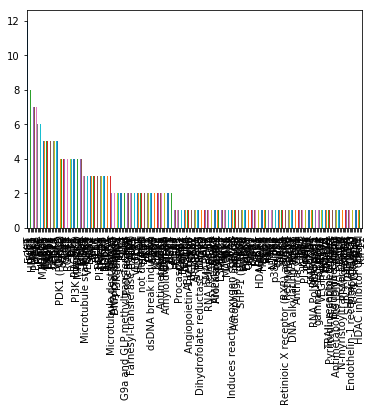

In [76]:
target_drug_df.TARGET.value_counts().plot(kind='bar')

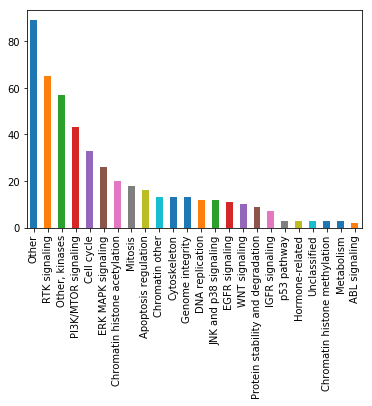

In [78]:
target_drug_df.TARGET_PATHWAY.value_counts().plot(kind='bar')